## Synthetic directional wave spectrum 

This notebook creates a synthetic directional wave spectrum which is Gaussian in frequency and has a cosine directional distribution. We assume that the energy density spectrum can be decomposed into a frequency spectrum and a normalized directional distribution, such that:

$$
E(f, \theta) = E(f)D(\theta),
$$

where

$$
E(f) = A~exp\left[-1.25 \left( \frac{f-f_p}{\sigma_f}\right)^2\right], 
$$

and 

$$
    D(\theta) = \cos(\theta -\theta_p)^{ncos}
$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from create_boundary_spec import *
from plot_dirSpec import  plot_dirSpec

In [43]:
Ndir = 48 # number of directional bins
dp = 270 # peak direction
fp = 1./10
ncos = 20 # exponent of cosine
lowf = 0.04118 # lowest frequency
ffactor = 1.1 # frequency increment factor f(i+1)/f(i) = 1.1
Nf = 64 # number of frequency bins
sip = 0.01 # frequency spread
hs_max = 1.0 # significant wave height

In [44]:
# This makes the spectrum with the WW3 convention for directions
freq, ww3_directions, Efth = idealized_dirspec(Ndir, dp, ncos, lowf, ffactor, Nf,  fp, sip, hs_max)

In [45]:
# This converts the spectrum from the WW3 convention to CDIP's convention
dirspec, ff, dd = convert_ww3_ethf(Efth, input_freq=freq, input_dir=ww3_directions)

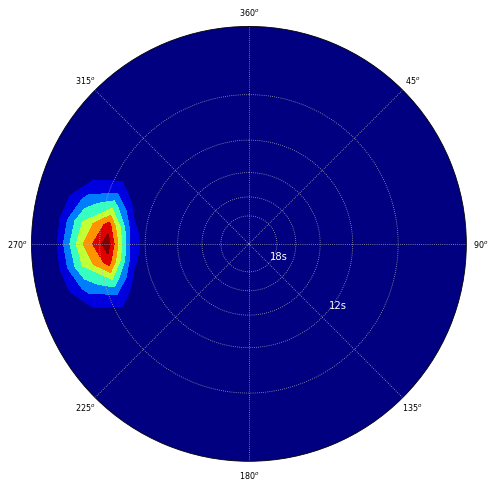

In [46]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='polar')
cmap = cm.jet
cs = ax.contourf(dd,ff,dirspec,extend='both', cmap=cmap)
ax.set_rmax(0.125)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
thetaticks = np.arange(0,360,45)
thetalabels = [str(s)+'$^o$' for s in np.arange(0,360,45)]
thetalabels[0] = '360'+'$^o$'
ax.set_thetagrids(thetaticks, thetalabels, fontsize=8)
periods = np.array([18,16,14,12,10])
rticks = 1./periods
rlabels = ['18s','','','12s','']
ax.set_rgrids(rticks)
ax.set_rlabel_position(130)
ax.set_yticklabels(rlabels, fontsize=10, color='w')
ax.yaxis.grid(linestyle='dotted')
ax.xaxis.grid(linestyle='dotted')

In [68]:
# testing Hs
freq_ext = np.append(freq, freq[-1]*ffactor)
df = np.diff(freq_ext)
dth = abs(dd[0,0]- dd[1,0])
Hs = 4*np.sqrt(np.sum(np.dot(dirspec, df)*dth))
print(Hs)

1.0000000000000002
